<a href="https://colab.research.google.com/github/SandeepH2706/IITM_MLT/blob/main/week3_prog_assignment_ques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [2]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


## Problem 1
How many samples are there in the dataset?



## Solution

In [3]:
# Enter your solution here
num_samples = X.shape[0]
print(num_samples)

1998


## Problem 2

How many features are there in the dataset?


## Solution

In [4]:
# Enter your solution here
num_features = X.shape[1]
print(num_features)


2


## Problem 3
Plot the dataset using matplotlib.



## Solution

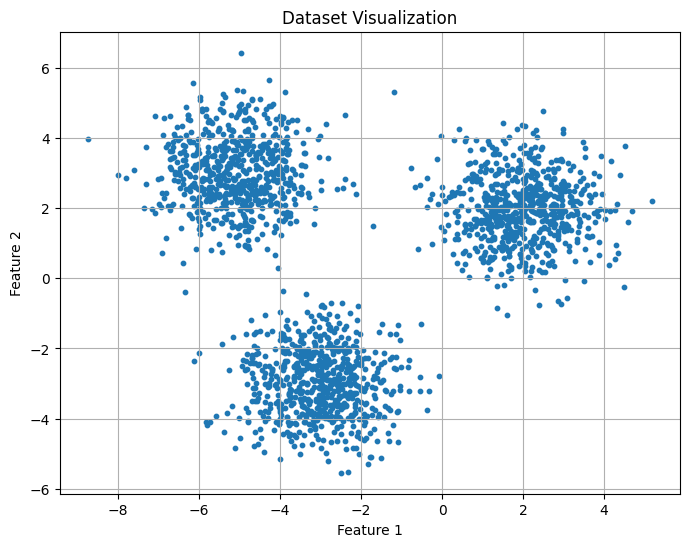

In [6]:
# Enter your solution here
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [8]:
# Enter your code here
initial_centers = X[[200, 800, 1200]]
print("Initial Cluster Centers:")
initial_centers

Initial Cluster Centers:


array([[ 1.40134606,  0.88410301],
       [-2.56922887, -3.14989159],
       [-2.84782302, -3.37412632]])

## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [10]:
def assign_clusters(X, k, cluster_centers):
    # Calculate Euclidean distance from each point to each cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - cluster_centers, axis=2)
    # Assign each point to the closest cluster (0, 1, or 2)
    z = np.argmin(distances, axis=1)
    return z

In [11]:
# Enter your solution here
# Assign clusters
z = assign_clusters(X, k=3, cluster_centers=initial_centers)

# Calculate mean of cluster assignments
mean_z = np.mean(z)
print(round(mean_z, 3))  # Output: 0.711

0.711


## Problem 5

Plot the data points, with different color for different clusters.


## Solution

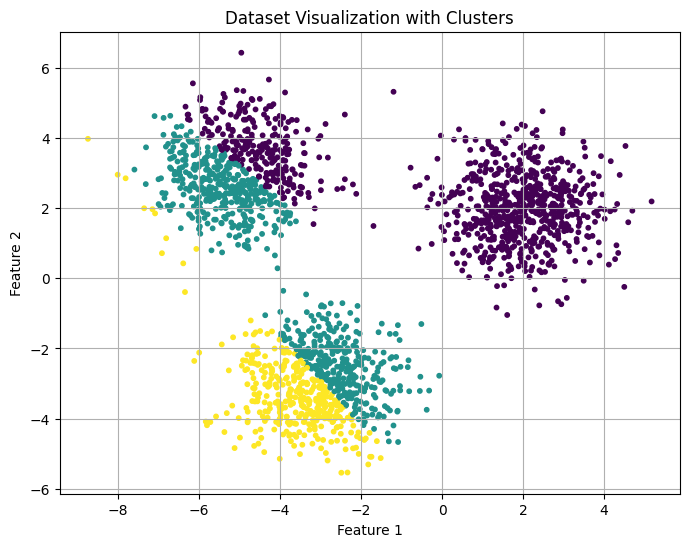

In [12]:
# Enter your solution here
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=z, cmap='viridis', s=10)
plt.title('Dataset Visualization with Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [13]:
# Enter your solution here

def compute_cluster_centers(X, z, k):
    new_centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        # Select data points belonging to cluster i
        cluster_points = X[z == i]
        if len(cluster_points) > 0:
            # Compute the mean of these points as the new cluster center
            new_centers[i] = np.mean(cluster_points, axis=0)
        else:
            # If a cluster is empty, keep the previous center or handle as needed
            # For this problem, we assume clusters won't be empty after the first assignment
            pass # Or handle empty cluster appropriately

    return new_centers

# Compute new cluster centers based on the current assignments 'z'
new_cluster_centers = compute_cluster_centers(X, z, k=3)
print("New Cluster Centers:")
print(new_cluster_centers)

# Calculate the mean of the three new cluster centers
mean_of_centers = np.mean(new_cluster_centers, axis=0)
print("\nMean of the three cluster centers:")
print(f"x1 component: {round(mean_of_centers[0], 3)}")
print(f"y1 component: {round(mean_of_centers[1], 3)}")

New Cluster Centers:
[[ 0.15243752  2.47002787]
 [-4.09339723  0.26891354]
 [-3.71658966 -3.31569723]]

Mean of the three cluster centers:
x1 component: -2.553
y1 component: -0.192


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

In [ ]:
# Enter your code here